## Figure S1: regular structures with flat message length

In [1]:
import sys
from random import random

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sb

sys.path.append("../src/")

import xgi
from statannotations.Annotator import Annotator

from hypergraph_reducibility import find_charact_tau, optimization

sb.set_theme(style="ticks", context="paper")

In [2]:
palette = sb.cubehelix_palette(
    start=2.3, rot=0.0, dark=0.35, light=0.9, as_cmap=False, n_colors=4, reverse=True
)
sb.set_palette(palette)
palette

[[0.1864737742223481, 0.42817540482404803, 0.36776204954698094],
 [0.3552744615776239, 0.6200435958444379, 0.5538645149046753],
 [0.5726826684223166, 0.7882411282035537, 0.7343622620108751],
 [0.8386983947564264, 0.9327680019013955, 0.9092552908655802]]

In [3]:
sb.color_palette("crest")

[(0.48942421, 0.72854938, 0.56751036),
 (0.34892097, 0.64828676, 0.56513633),
 (0.24929311, 0.56486397, 0.5586654),
 (0.15615526, 0.47913212, 0.54850526),
 (0.11131735, 0.39155635, 0.53422678),
 (0.14573579, 0.29354139, 0.49847009)]

In [4]:
palette[1]

[0.3552744615776239, 0.6200435958444379, 0.5538645149046753]

In [5]:
sb.cubehelix_palette(rot=-0.4, dark=0.3)

[[0.7788013041060939, 0.8977179643101579, 0.7971480974663592],
 [0.6134506682164845, 0.8142462550039887, 0.6975983250108415],
 [0.4656457578928198, 0.7161885378682564, 0.6284309618978261],
 [0.34578922187214445, 0.6015106895337712, 0.5721854455518277],
 [0.25318977343381555, 0.46803524902300564, 0.5067755143579389],
 [0.18734079863984593, 0.33178359036045907, 0.41895106294640405]]

In [6]:
sb.color_palette("light:#29AB87")

[(0.917139939135656, 0.9517714678297925, 0.9370383847160141),
 (0.7658688140536227, 0.8955348213226575, 0.8555130607139877),
 (0.6145976889715896, 0.8392981748155225, 0.7739877367119614),
 (0.4633265638895565, 0.7830615283083876, 0.692462412709935),
 (0.3120554388075233, 0.7268248818012526, 0.6109370887079086),
 (0.1607843137254902, 0.6705882352941176, 0.5294117647058824)]

In [7]:
results_dir = "../results/"
out_dir = f"{results_dir}synthetic/"

## generate complete hypergraph

In [9]:
N = 10
rescale = True
d_max = 4

H0 = xgi.complete_hypergraph(N=N, max_order=d_max)
H_complete = xgi.complete_hypergraph(N=N, max_order=d_max)


orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

In [10]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

inverse_rescaling_factors = [max(orders) / d for d in orders]
Ds_H, lZs_H = optimization(
    H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale
)

100%|████████████████████████████████████████████| 4/4 [00:00<00:00, 153.11it/s]


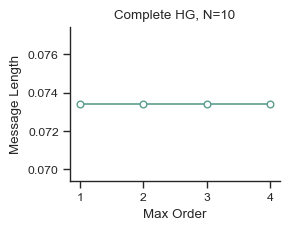

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-", mfc="w", c=palette[1])

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")
ax.set_title(f"Complete HG, N={N}")

# ax.set_ylim([0.02, 0.04])
# ax.set_yticks([0.02, 0.03, 0.04])


sb.despine()

fig_name = f"message_length_a2a_node_rescaled_tauc_N_{N}"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [12]:
xgi.laplacian(H0, order=1, rescale_per_node=False)

array([[ 9, -1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1,  9, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1,  9, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  9, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  9, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1,  9, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  9, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  9, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1,  9, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1,  9]])

In [13]:
xgi.laplacian(H0, order=2, rescale_per_node=True)

array([[36., -4., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., 36., -4., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., 36., -4., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., 36., -4., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., 36., -4., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., 36., -4., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., 36., -4., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., 36., -4., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., 36., -4.],
       [-4., -4., -4., -4., -4., -4., -4., -4., -4., 36.]])

In [14]:
np.diff(message_length)

array([0., 0., 0.])

In [15]:
np.save(f"{results_dir}message_lengths_2a2.npy", message_length)

## generate full triangular lattice

In [16]:
def triangular_lattice_flag(n_rows, p2, periodic=False):
    """
    Generates a flag complex from a triangular lattice graph.

    Parameters
    ----------
    n_rows : int
        Number of rows in the lattice.
    p2 : float
        Probability of adding a 2-simplex to the clique complex.
    periodic : bool, optional
        Whether the lattice should have periodic boundary conditions. Default is False.

    Returns
    -------
    S_lattice : xgi Simplicial Complex

    pos : dict
        Node positions keyed by node ID.
    """

    # number of rows
    m = n_rows - 1
    # number of columns
    columns = n_rows + 1
    n = 2 * columns - 1

    if not periodic:
        n = n - 1
        m = m - 1

    # generate lattice
    G_lattice = nx.triangular_lattice_graph(
        m, n, periodic=periodic, with_positions=True
    )
    G_lattice = nx.convert_node_labels_to_integers(G_lattice)
    pos = nx.get_node_attributes(G_lattice, "pos")

    # generate random clique complex (fill in triangles)
    S_lattice = xgi.flag_complex_d2(G_lattice, p2=p2)
    return S_lattice, pos

In [17]:
n_rows = 6
rescale = True
d_max = 2
p_2 = 1

H0, _ = triangular_lattice_flag(n_rows, p2=p_2, periodic=True)
H_lattice, pos_lattice = triangular_lattice_flag(n_rows, p2=p_2, periodic=False)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

N = H0.num_nodes

In [18]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

inverse_rescaling_factors = [d_max / d for d in orders]
Ds_H, lZs_H = optimization(
    H0, tau_c, rescaling_factors=inverse_rescaling_factors, rescale_per_node=rescale
)

100%|████████████████████████████████████████████| 2/2 [00:00<00:00, 251.70it/s]


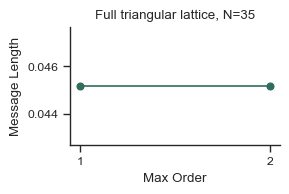

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")

ax.set_title(f"Full triangular lattice, N={N}")

ax.set_xticks([1, 2])
plt.subplots_adjust(top=0.7, wspace=0.3)

sb.despine()

fig_name = f"message_length_full_triangular_lattice_rescaled_tauc_N_{N}"

# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [20]:
np.diff(message_length)

array([0.])

In [21]:
np.save(f"{results_dir}message_lengths_latticetri.npy", message_length)

## together

In [22]:
message_lengths_a2a = np.load(f"{results_dir}message_lengths_2a2.npy")
message_lengths_tri = np.load(f"{results_dir}message_lengths_latticetri.npy")

In [23]:
message_lengths_a2a

array([0.07340424, 0.07340424, 0.07340424, 0.07340424])

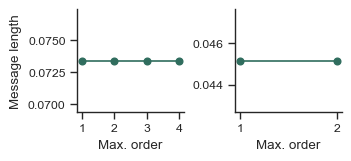

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(3.4, 1.5), layout="constrained")

orders1 = list(range(1, 5))
ax1.plot(orders1, message_lengths_a2a, "o-")

# ax1.set_ylim([0.02, 0.04])
# ax1.set_yticks([0.02, 0.03, 0.04])
ax1.set_xticks(orders1)

orders2 = list(range(1, 3))
ax2.plot(orders2, message_lengths_tri, "o-")
ax2.set_xticks(orders2)

ax1.set_ylabel("Message length")
ax1.set_xlabel("Max. order")
ax2.set_xlabel("Max. order")


sb.despine()

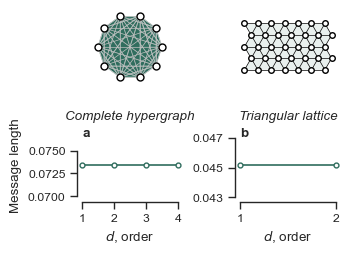

In [33]:
fig, axs = plt.subplots(
    2, 2, figsize=(3.4, 2.5), height_ratios=[1, 1]
)  # ,layout="constrained")

orders1 = list(range(1, 5))
axs[1, 0].plot(orders1, message_lengths_a2a, "o-", ms=3.5, mfc="w")

# axs[1, 0].set_ylim([0.02, 0.04])
axs[1, 0].set_yticks([0.07, 0.0725, 0.075])
axs[1, 0].set_xticks(orders1)

orders2 = list(range(1, 3))
axs[1, 1].plot(orders2, message_lengths_tri, "o-", ms=3.5, mfc="w")
axs[1, 1].set_xticks(orders2)
axs[1, 1].set_yticks([0.043, 0.045, 0.047])


axs[1, 0].set_ylabel("Message length")
axs[1, 1].set_xlabel("$d$, order")
axs[1, 0].set_xlabel("$d$, order")

axs[1, 0].set_title("Complete hypergraph", style="italic")
axs[1, 1].set_title("Triangular lattice", style="italic")

pos_complete = xgi.circular_layout(H_complete)
xgi.draw(
    H_complete,
    pos=pos_complete,
    alpha=0.1,
    ax=axs[0, 0],
    node_size=5,
    dyad_color="silver",
    dyad_lw=0.5,
    edge_fc=palette[0],
)

_, _ = xgi.draw(
    H_lattice,
    pos=pos_lattice,
    alpha=0.1,
    ax=axs[0, 1],
    node_size=4,
    dyad_color="black",
    dyad_lw=0.5,
    edge_fc=palette[0],
)

sb.despine(bottom=False, trim=True)
plt.subplots_adjust(wspace=0.5, hspace=0.6)

fig_name = f"figure_1_flat"

import string

# string.ascii_lowercase
for i, ax in enumerate(axs.ravel()[2:]):
    ax.text(
        0.05,
        1,
        string.ascii_lowercase[i],
        transform=ax.transAxes,
        weight="bold",
        ha="left",
        va="top",
    )


plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight", pad_inches=0)
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight", pad_inches=0)

## complete with holes

In [228]:
N = 10
rescale = True
d_max = 4

H0 = xgi.complete_hypergraph(N=N, max_order=d_max)
# H_complete = xgi.complete_hypergraph(N=N, max_order=d_max)


orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

print(H0)

p_rm = 1

edges_rm = []
orders_rm = [3]
for order in orders_rm:
    edges_rm += [i for i in H0.edges.filterby("order", order) if random() < p_rm]
# print(edges_rm)
print(len(edges_rm))

H0.remove_edges_from(edges_rm)

orders = np.array(xgi.unique_edge_sizes(H0)) - 1
weights = np.ones(len(orders))

print(H0)

Unnamed Hypergraph with 10 nodes and 627 hyperedges
210
Unnamed Hypergraph with 10 nodes and 417 hyperedges


In [234]:
tau_c = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

# inverse_rescaling_factors = [max(orders) / d for d in orders]

inverse_rescaling_factors = [len(orders) / i for i in range(1, len(orders) + 1)]
suffix = "rescaling_present_orders"

# inverse_rescaling_factors = list(range(1, len(orders)+1))[::-1]

# inverse_rescaling_factors = [1 for d in orders]
# suffix = "no_rescaling"

tau_per_order = False

# tau_c = 1
# suffix = "tau_per_order"

if tau_per_order and suffix != "tau_per_order":
    raise ValueError("check input params")


Ds_H, lZs_H = optimization(
    H0,
    tau_c,
    rescaling_factors=inverse_rescaling_factors,
    rescale_per_node=rescale,
    tau_per_order=tau_per_order,
)

100%|████████████████████████████████████████████| 3/3 [00:00<00:00, 258.71it/s]


/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_88748/451306837.py:10: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0, 0].get_shared_y_axes().join(axs[0, 0], axs[0, 1])
/var/folders/wm/5gv37br900l73y63tjf8sr1r0000gn/T/ipykernel_88748/451306837.py:11: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs[0, 0].get_shared_y_axes().join(axs[0, 0], axs[0, 2])


3.00e-01
rescaling_present_orders


'message_length_a2a_N_10_p_rm_1_orders_rm_[3]_tau_N_full'

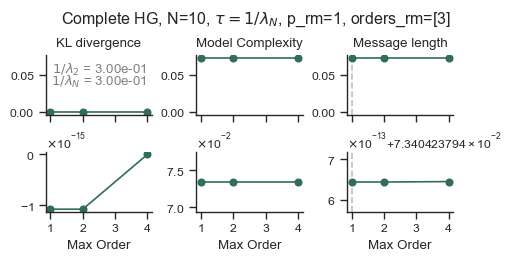

In [235]:
fig, axs = plt.subplots(
    2, 3, figsize=(5, 2.5), sharey=False, sharex=True, layout="constrained"
)

message_length = Ds_H + lZs_H
axs[0, 0].plot(orders, Ds_H, "o-")
axs[0, 1].plot(orders, lZs_H, "o-")
axs[0, 2].plot(orders, message_length, "o-")

axs[0, 0].get_shared_y_axes().join(axs[0, 0], axs[0, 1])
axs[0, 0].get_shared_y_axes().join(axs[0, 0], axs[0, 2])


axs[1, 0].plot(orders, Ds_H, "o-")
axs[1, 1].plot(orders, lZs_H, "o-")
axs[1, 2].plot(orders, message_length, "o-")

# ax.set_ylabel("Message Length")
axs[1, 0].set_xlabel("Max Order")
axs[1, 1].set_xlabel("Max Order")
axs[1, 2].set_xlabel("Max Order")

axs[1, 0].set_xticks(range(1, 5))
# ax.set_title("functional complex.")
fig.suptitle(
    rf"Complete HG, N={N}, $\tau = 1 / \lambda_N$,"
    + f" p_rm={p_rm}, orders_rm={orders_rm}"
)

# ax.set_ylim([0.02, 0.04])
# ax.set_yticks([0.02, 0.03, 0.04])

order_min = np.argmin(message_length)
axs[1, 2].axvline(orders[order_min], ls="--", zorder=-2, alpha=0.5, c="grey")
axs[0, 2].axvline(orders[order_min], ls="--", zorder=-2, alpha=0.5, c="grey")

tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)
tau_N = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

axs[0, 0].text(
    0.5,
    0.9,
    rf"$1 / \lambda_2$ = {tau_2:.2e}",
    va="top",
    ha="center",
    transform=axs[0, 0].transAxes,
    c="grey",
)
axs[0, 0].text(
    0.5,
    0.7,
    rf"$1 / \lambda_N$ = {tau_N:.2e}",
    va="top",
    ha="center",
    transform=axs[0, 0].transAxes,
    c="grey",
)

axs[1, 0].ticklabel_format(
    axis="y", style="scientific", scilimits=(0, 0), useMathText=True, useOffset=True
)
axs[1, 1].ticklabel_format(
    axis="y", style="scientific", scilimits=(0, 0), useMathText=True, useOffset=True
)
axs[1, 2].ticklabel_format(
    axis="y", style="scientific", scilimits=(0, 0), useMathText=True, useOffset=True
)

axs[0, 0].set_title("KL divergence")
axs[0, 1].set_title("Model Complexity")
axs[0, 2].set_title("Message length")


print(f"{tau_N:.2e}")
print(suffix)

sb.despine()

fig_name = f"message_length_a2a_N_{N}_p_rm_{p_rm}_orders_rm_{orders_rm}_tau_N_full"
fig_name
# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

2.37e-01


'message_length_a2a_N_20_p_rm_0.0_orders_rm_[4]_tau_N'

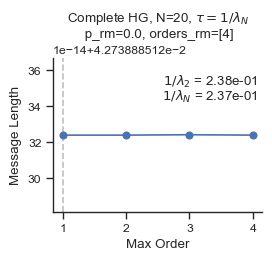

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2))

message_length = Ds_H + lZs_H
ax.plot(orders, message_length, "o-")

ax.set_ylabel("Message Length")
ax.set_xlabel("Max Order")
ax.set_title("functional complex.")
ax.set_title(
    rf"Complete HG, N={N}, $\tau = 1 / \lambda_N$"
    + f"\n p_rm={p_rm}, orders_rm={orders_rm}"
)

# ax.set_ylim([0.02, 0.04])
# ax.set_yticks([0.02, 0.03, 0.04])

order_min = np.argmin(message_length)
ax.axvline(orders[order_min], ls="--", zorder=-2, alpha=0.5, c="grey")

tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)
tau_N = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

ax.text(
    0.75,
    0.9,
    rf"$1 / \lambda_2$ = {tau_2:.2e}",
    va="top",
    ha="center",
    transform=ax.transAxes,
)
ax.text(
    0.75,
    0.8,
    rf"$1 / \lambda_N$ = {tau_N:.2e}",
    va="top",
    ha="center",
    transform=ax.transAxes,
)

print(f"{tau_N:.2e}")

sb.despine()

fig_name = f"message_length_a2a_N_{N}_p_rm_{p_rm}_orders_rm_{orders_rm}_tau_N"
fig_name
# plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")

In [455]:
tau_2 = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=1)
tau_N = find_charact_tau(H0, orders, weights, rescale_per_node=rescale, idx=-1)

print(f"{tau_2:.2e}")
print(f"{tau_N:.2e}")

2.41e-01
2.33e-01


In [437]:
from numpy.linalg import eigvalsh

In [285]:
L_multi = xgi.multiorder_laplacian(
    H0, orders, weights, rescale_per_node=True, sparse=False
)

lambdas = eigvalsh(L_multi)

spectrum = 1 / lambdas